In [1]:
import nibabel as nib
import json
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [2]:
image_path = './imagesTr/aneurysm_000_0000.nii.gz'
brain_vol = nib.load(image_path)

sx, sy, sz = brain_vol.header.get_zooms()
volume = sx * sy * sz #mm^2
print(brain_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 350 448 144   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.         0.46875    0.46875    0.70000005 0.022      0.
 0.         0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 498.0
cal_min         : -38.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.1'
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -81.5625
qoffset_y       : -104.531

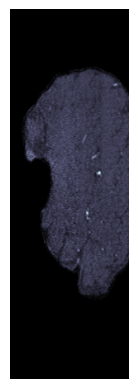

In [3]:
brain_vol_data = brain_vol.get_fdata()
plt.imshow(brain_vol_data[70], cmap='bone')
plt.axis('off')
plt.show()

In [15]:
brain_vol_data.shape

(350, 448, 144)

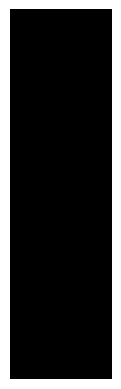

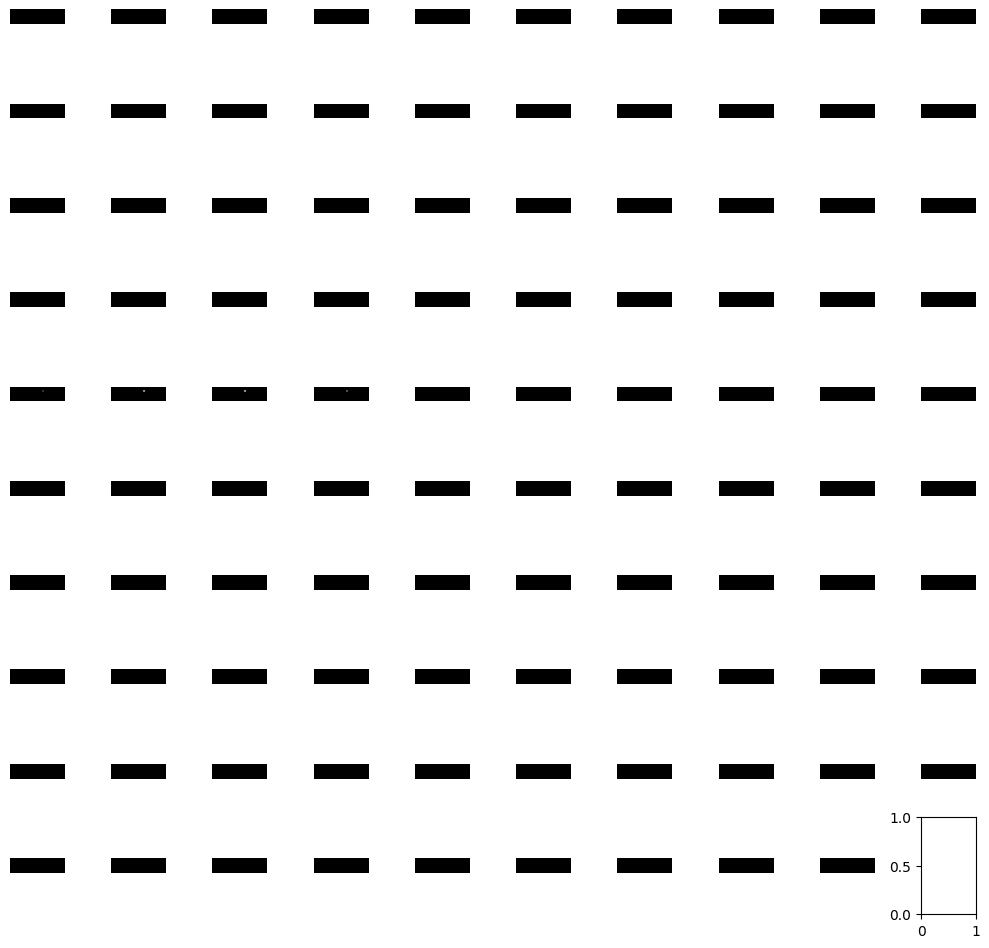

In [65]:
image_path = './imagesTr/aneurysm_000_0000.nii.gz'
image_path = '.\PreSegData\labels\sub-022_ses-20101011_desc-Lesion_1_mask.nii.gz'
brain_vol = nib.load(image_path)

brain_vol_data = brain_vol.get_fdata()
plt.imshow(brain_vol_data[225], cmap='bone')
plt.axis('off')
plt.show()

fig_rows = 10
fig_cols = 10
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[:, img, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [24]:
import cv2
import os

In [114]:
def count_white_pixels(image):

    normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    _, binary = cv2.threshold(normalized_image, 0, 255, cv2.THRESH_BINARY)

    # Get image dimensions
    height, width = binary.shape[:2]

    # Count white pixels on left and right sides
    left_count = np.sum(binary[:, :width // 2] == 255)
    right_count = np.sum(binary[:, width // 2:] == 255)

    if left_count>right_count:
        print("f")
        return max(left_count, right_count), "left"
    if right_count > left_count:
        print("SF")
        return max(left_count, right_count), "right"
    else:
        return max(left_count, right_count), "none"


image = ndi.rotate(brain_vol_data[:, 70, :], 90)

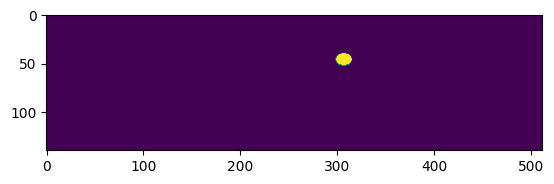

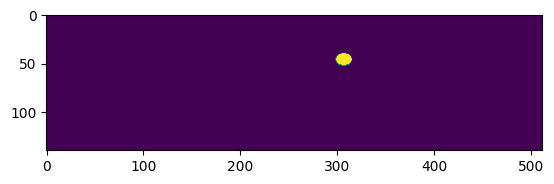

In [113]:
mask_path = ".\PreSegData\labels\sub-022_ses-20101011_desc-Lesion_1_mask.nii.gz"
#mask_path = './imagesTr/aneurysm_000_0000.nii.gz'
brain_vol = nib.load(mask_path)
brain_vol_data = brain_vol.get_fdata()


image = ndi.rotate(brain_vol_data[:, 219, :], 90)
plt.imshow(image)
plt.show()

_, result = count_white_pixels(image)
normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
_, binary = cv2.threshold(normalized_image, 100, 255, cv2.THRESH_BINARY)

plt.imshow(binary)
plt.show()


In [115]:
mask_path = ".\PreSegData\labels\sub-022_ses-20101011_desc-Lesion_1_mask.nii.gz"
#mask_path = './imagesTr/aneurysm_000_0000.nii.gz'
brain_vol = nib.load(mask_path)
brain_vol_data = brain_vol.get_fdata()

#top down is 1st index, [: x :]
left_counter = 0
right_counter = 0
num_top_down_slices = brain_vol_data.shape[1]
print(num_top_down_slices)
for idx, img in enumerate(range(num_top_down_slices)):
    
    image = ndi.rotate(brain_vol_data[:, img, :], 90)
    _, result = count_white_pixels(image)
    
    if result == "left":
        left_counter += 1
    if result == "right":
        right_counter += 1
print(right_counter, left_counter)

512
f
f
f
f
f
f
f
f
f
f
0 10


In [31]:
folder_path = "./PreSegData/labels"
files = os.listdir(folder_path)

for file in files:
    mask_path = os.path.join(folder_path, file)
    brain_vol = nib.load(mask_path)
    brain_vol_data = brain_vol.get_fdata()

#top down is 1st index, [: x :]
left_counter = 0
right_counter = 0
num_top_down_slices = brain_vol_data.shape[1]
for idx, img in enumerate(range(num_top_down_slices, plot_range, step_size)):
    image = ndi.rotate(brain_vol_data[:, img, :], 90)
    _, result = count_white_pixels(image)
    if result == "left":
        left_counter += 1
    else:
        right_counter += 1



KeyboardInterrupt: 

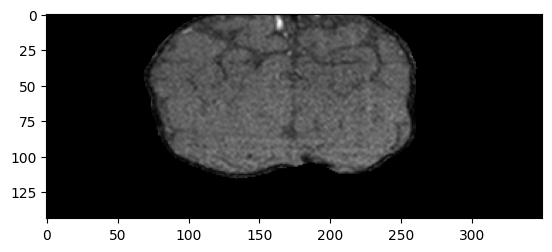

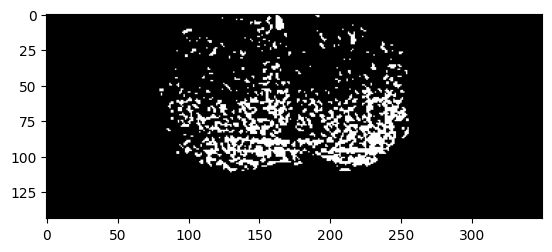

2042 left


In [7]:
data = sitk.ReadImage(image_path) 

# get metadata dict
header = {k: data.GetMetaData(k) for k in data.GetMetaDataKeys()}
header

{'ITK_FileNotes': '6.0.1',
 'ITK_original_direction': '[UNKNOWN_PRINT_CHARACTERISTICS]\n',
 'ITK_original_spacing': '[UNKNOWN_PRINT_CHARACTERISTICS]\n',
 'aux_file': '',
 'bitpix': '32',
 'cal_max': '498',
 'cal_min': '-38',
 'datatype': '16',
 'descrip': '6.0.1',
 'dim[0]': '3',
 'dim[1]': '350',
 'dim[2]': '448',
 'dim[3]': '144',
 'dim[4]': '1',
 'dim[5]': '1',
 'dim[6]': '1',
 'dim[7]': '1',
 'dim_info': '0',
 'intent_code': '0',
 'intent_name': '',
 'intent_p1': '0',
 'intent_p2': '0',
 'intent_p3': '0',
 'nifti_type': '1',
 'pixdim[0]': '0',
 'pixdim[1]': '0.46875',
 'pixdim[2]': '0.46875',
 'pixdim[3]': '0.7',
 'pixdim[4]': '0.022',
 'pixdim[5]': '0',
 'pixdim[6]': '0',
 'pixdim[7]': '0',
 'qfac': '[UNKNOWN_PRINT_CHARACTERISTICS]\n',
 'qform_code': '1',
 'qform_code_name': 'NIFTI_XFORM_SCANNER_ANAT',
 'qoffset_x': '-81.5625',
 'qoffset_y': '-104.531',
 'qoffset_z': '-50.4',
 'qto_xyz': '[UNKNOWN_PRINT_CHARACTERISTICS]\n',
 'quatern_b': '0',
 'quatern_c': '0',
 'quatern_d': '0',
